In [1]:
import torch

В торче основная конструкция для хранения данных это Тензор. Можно считать что Тензор - просто многомерный вектор

In [2]:
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00  3.6893e+19  1.2170e+23
-2.8615e-42  5.7932e-30  1.4013e-45
 1.4013e-45  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]



In [3]:
x = torch.rand(5, 3)
print(x)


 0.0460  0.9913  0.9844
 0.3554  0.4346  0.4759
 0.7499  0.1073  0.5642
 0.8243  0.8188  0.2357
 0.1804  0.2292  0.8135
[torch.FloatTensor of size 5x3]



In [4]:
print(x.size())

torch.Size([5, 3])


Почти все операторы работающие с векторами (np.array) работают и тут

In [5]:
y = torch.rand(5, 3)
print(x + y)


 0.0590  1.7655  1.5728
 1.1754  0.7999  1.0758
 1.3024  0.5714  0.9647
 0.9897  1.3714  0.7772
 0.9728  0.3926  1.7297
[torch.FloatTensor of size 5x3]



In [6]:
print(y[:, 1])


 0.7742
 0.3653
 0.4641
 0.5526
 0.1634
[torch.FloatTensor of size 5]



Здесь нет reshape, вместо него view

In [7]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


Можно переводить тезоры в нампай и обратно

In [8]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [9]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [10]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [11]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



Если есть подключеная видеокарта с кудой, то пайторч может сразу ее подключить

In [12]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

Пайторч может в рантайме посчитать производные по переменным типа Variable

In [13]:
from torch.autograd import Variable

In [14]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [15]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [16]:
z = y * y * 3
out = z.mean()

print(z, out)


Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [17]:
out.backward()

In [18]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



##### Для начала поймем что такое MNIST

70000 рукописных изображений цифр от 0 до 9

Превосходный датасет для классификации


Нам повезло, в пайторче есть встроенная утилита, которая сама сможет подгрузить датасет и разбить на train/test, а также распараллелить выдачу

In [19]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

Принято учить машины батчами, то есть небольшими наборами данных. В этом примере я поставил batch_size = 32, это значит что в свою модель я буду подавать 32 картинки

In [20]:
train_loader = DataLoader(
    datasets.MNIST('./mnist', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0,), (1,))
                   ])),
    batch_size=32, shuffle=True)

In [21]:
test_loader = DataLoader(
    datasets.MNIST('./mnist', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0,), (1,))
                   ])),
    batch_size=32, shuffle=True)


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Каждая картинка задается тремя размерностями:

1. Количество слоев - каналы. Обычно это RGB формат, красные, зеленые и синие. В данном конкретном случае у нас черно-белые фотографии, поэтому канал только один.
2. Высота
3. Ширина

In [23]:
example_batch = next(iter(test_loader))
example_batch

[
 (0 ,0 ,.,.) = 
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
            ...             ⋱             ...          
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
      ⋮ 
 
 (1 ,0 ,.,.) = 
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
            ...             ⋱             ...          
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
      ⋮ 
 
 (2 ,0 ,.,.) = 
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...  

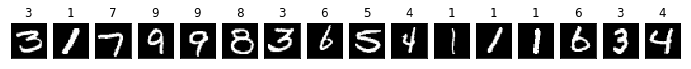

In [24]:
image_size = 28
show_image_n = 16

fig = plt.figure(figsize=(12, 1))
for i in range(1, show_image_n + 1):
    ax = fig.add_subplot(1, show_image_n, i)
    
    ax.set_title(f'{example_batch[1][i]}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.imshow(example_batch[0][i].view(image_size, image_size), cmap="gray")


#### Первая сетка

In [25]:
example_batch[0][0].view(-1).shape

torch.Size([784])

In [26]:
import torch.nn.functional as F
from torch import nn

In [27]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 300)
        self.fc2 = nn.Linear(300, 10)

    def forward(self, x):
        # Для начала превратим одно изображение из формата batch-channels-высота-ширина в batch-изображение
        x = x.view(32, -1)
        # Теперь пропустим нашу вектор-картинку через полносвязный слой
        x = self.fc1(x)
        # Не забыть активацию
        x = F.relu(x)
        # Получили вектор-типа-картинку размера 300
        # Пропустим через следующий слой
        x = self.fc2(x)
        # активация
        x = F.relu(x)
        # Теперь мы получили вектор размера 10. Будем считать что на i месте стоит значение принадлежности i классу;
        # Чтобы это было лучше читаемо обычно из этих чисел моделируют вероятность. 
        # Для этого используют функцию Softmax. Максим напишет ее на доске
        x = F.softmax(x)
        return x

In [28]:
net = Net()

In [29]:
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=10, bias=True)
)


In [30]:
net.parameters()

<generator object Module.parameters at 0x120520fc0>

In [31]:
[i for i in net.parameters()]

[Parameter containing:
  2.8792e-02 -1.3612e-02 -2.6393e-02  ...   3.3812e-03 -2.3974e-02 -2.2690e-02
  2.5442e-02  9.7547e-03  2.2899e-02  ...  -3.1028e-02  1.0752e-02  8.8385e-03
 -1.4885e-02 -1.1392e-02 -3.1062e-02  ...   7.6688e-03 -2.4116e-02 -1.9402e-02
                 ...                   ⋱                   ...                
 -7.8700e-03 -1.7190e-02 -3.1472e-02  ...   4.8837e-03 -5.1275e-03  2.6451e-02
  2.8672e-02 -1.3410e-02  3.5396e-02  ...  -3.1657e-02  1.5791e-02 -2.4585e-02
 -8.3566e-03  8.1992e-03  2.2810e-03  ...  -1.8209e-02 -9.5589e-04  2.5686e-03
 [torch.FloatTensor of size 300x784], Parameter containing:
 1.00000e-02 *
  -3.2233
   2.8514
  -0.2818
  -1.6127
  -2.8616
  -0.3181
  -0.8782
  -0.8002
   3.1034
  -0.5791
  -2.2503
  -1.6533
   2.0772
  -0.7260
  -3.4735
   3.0616
   0.5766
  -1.2585
  -0.9520
  -1.4079
  -1.9540
   0.3086
  -3.4430
  -0.5938
  -2.6579
  -1.2490
  -1.1375
  -2.5134
   1.3765
  -1.4989
  -1.1662
   3.1770
   1.7401
  -2.9734
   2.4594

#### Функция потерь

Сейчас нам нужно выбрать функцию которую мы будем минимизировать. По ней будут считаться градиенты и все такое. Задачей нашей сети будет минимизация этой функции

Для многоклассовой классификации обычно используют кросс энтропию

In [32]:
criterion = nn.CrossEntropyLoss()

### Оптимизатор

Максим у доски сейчас расскажет про методы оптимизации

Базово - это штука которая знает как обновлять веса у модели чтобы уменьшить функцию потерь

In [33]:
from torch import optim

In [34]:
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)

tqdm - это простой и красивый визуализатор циклов

In [35]:
from tqdm import tqdm_notebook
from IPython.display import clear_output

In [36]:
train_plot = []
test_plot = []

Epoch 9
Train accuracy: 0.984266666667
Test accuracy: 1.0


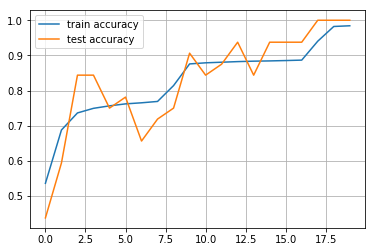

In [38]:
for epoch in tqdm_notebook(range(10), desc='epoch'):
    # здесь мы проходим одну эпоху тренировки
    train_log = []
    for train_batch in tqdm_notebook(train_loader, desc='training'):
        # data - объекты, target - метки
        # Оборачиваем в Variable чтобы считать от них градиент
        data, target = Variable(train_batch[0]), Variable(train_batch[1])
        # обнуляем градиенты
        optimizer.zero_grad()
        # предсказываем метку для батча
        output = net(data)
        # считаем функцию потерь
        loss = criterion(output, target)
        # считаем градиент
        loss.backward()
        # меняем веса во всех слоях сети
        optimizer.step()
        # добавим accuracy и будем считать его все время чтобы рисовать график
        # Для начала посчитаем какой класс модель предсказала с максимальной уверенностью
        # Переводим все в нампай для лучшей наглядности
        model_outputs = np.argmax(output.data.numpy(), axis=1)
        targets = target.data.numpy().reshape(-1)
        train_log.extend(model_outputs == targets)
        
    train_plot.append(np.mean(train_log))
    # здесь мы будем считать ошибку на тестовой выборке, которую модель не видела
    test_log = []
    for test_batch in tqdm_notebook(test_loader, desc='testing'):
        data, target = Variable(train_batch[0]), Variable(train_batch[1])
        output = net(data)
        
        model_outputs = np.argmax(output.data.numpy(), axis=1)
        targets = target.data.numpy().reshape(-1)
       
        test_log.extend(model_outputs == targets)
        # здесь мы не трогаем градиенты
    test_plot.append(np.mean(test_log))
    clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_plot[-1])
    print("Test accuracy:", test_plot[-1])
    plt.plot(train_plot, label='train accuracy')
    plt.plot(test_plot, label='test accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
